<a href="https://colab.research.google.com/github/plaban1981/AI_MONK_Learning/blob/master/AV_Computer_vision_Hack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Emergency vs Non-Emergency Vehicle Classification
Fatalities due to traffic delays of emergency vehicles such as ambulance & fire brigade is a huge problem. In daily life, we often see that emergency vehicles face difficulty in passing through traffic. So differentiating a vehicle into an emergency and non emergency category can be an important component in traffic monitoring as well as self drive car systems as reaching on time to their destination is critical for these services.

In this problem, you will be working on classifying vehicle images as either belonging to the emergency vehicle or non-emergency vehicle category. For the same, you are provided with the train and the test dataset. Emergency vehicles usually includes police cars, ambulance and fire brigades.

# Label 

1 - Emergency Vehichle

0 - Non Emergency Vehicle

# Evaluation Metric
The evaluation metric for this competition is Accuracy.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import numpy as np
np.random.seed(1000)
import pandas as pd
import matplotlib.pyplot as plt

import os
import cv2
from PIL import Image

%matplotlib inline

In [0]:
train_dataset = []
train_label = []
test_dataset = []


In [0]:
img_path = '/content/drive/My Drive/AV_Hack/images'
#os.listdir(img_path)

In [0]:
train_img = pd.read_csv('/content/drive/My Drive/AV_Hack/train.csv')
test_img = pd.read_csv('/content/drive/My Drive/AV_Hack/test_vc2kHdQ.csv')

In [0]:
train_img .shape,test_img.shape

((1646, 2), (706, 1))

In [0]:
train_img.head()

,image_names,emergency_or_not
0,1503.jpg,0
1,1420.jpg,0
2,1764.jpg,0
3,1356.jpg,0
4,1117.jpg,0


In [0]:
test_img.head()

,image_names
0,1960.jpg
1,668.jpg
2,2082.jpg
3,808.jpg
4,1907.jpg


In [0]:
label = train_img['emergency_or_not'].values.tolist()
img_name = train_img['image_names'].values.tolist()

In [0]:
testimages = test_img['image_names'].values.tolist()

In [0]:
len(label),len(img_name),len(testimages)

(1646, 1646, 706)

## Reshape training images an array of shape(64,64) with 3 channels and generate labels for each corresponding image

In [0]:
folder_images = os.listdir(img_path)
for i, image_name in enumerate(folder_images):
  if image_name in img_name:
    image = cv2.imread(img_path+"/"+image_name)
    #print(image_name)
    #break
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((224,224))
    train_dataset.append(np.array(image))
    train_label.append(train_img[train_img['image_names']== image_name]['emergency_or_not'].values.tolist()[0])


In [0]:
len(train_dataset),len(train_label)

(1646, 1646)

In [0]:
train_dataset[0].shape

(224, 224, 3)

## Reshape test images an array of shape(64,64) with 3 channels in order to be fed to the model

In [0]:
folder_images = os.listdir(img_path)
for i, image_name in enumerate(folder_images):
  if image_name in testimages:
    image = cv2.imread(img_path+"/"+image_name)
    #print(image_name)
    #break
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image = Image.fromarray(image)
    image = image.resize((64, 64))
    test_dataset.append(np.array(image))
    

In [0]:
len(test_dataset)

706

In [0]:
test_dataset[0].shape

(224, 224, 3)

In [0]:
train_label[0]

1

# Randomly visualize 5 different training images

Text(0.5, 1.0, 'LABEL 0')

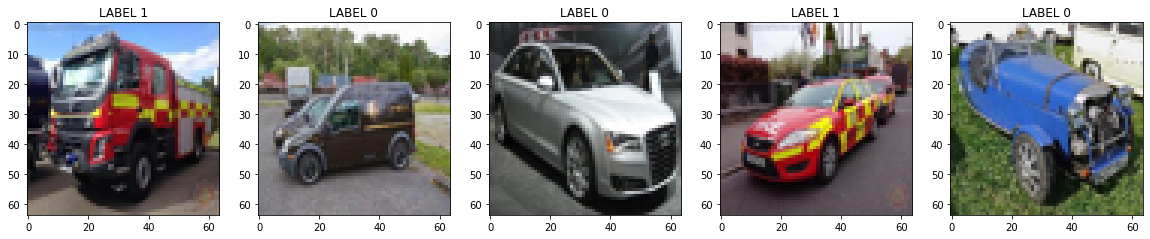

In [0]:
plt.figure(figsize = (20, 12))
plt.subplot(1,5,1)
plt.imshow(train_dataset[0])
plt.title('LABEL '+str(train_label[0]))
plt.subplot(1,5,2)
plt.imshow(train_dataset[100])
plt.title('LABEL '+str(train_label[100]))
plt.subplot(1,5,3)
plt.imshow(train_dataset[10])
plt.title('LABEL '+str(train_label[10]))
plt.subplot(1,5,4)
plt.imshow(train_dataset[20])
plt.title('LABEL '+str(train_label[20]))
plt.subplot(1,5,5)
plt.imshow(train_dataset[25])
plt.title('LABEL '+str(train_label[25]))

# Randomly visualize 5 different training images

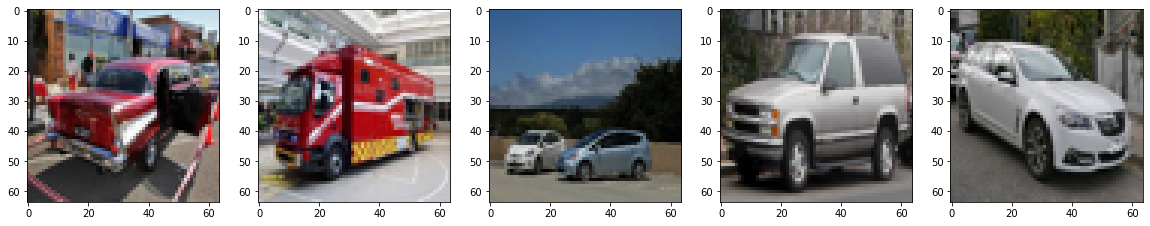

In [0]:
plt.figure(figsize = (20, 12))
plt.subplot(1,5,1)
plt.imshow(test_dataset[0])
plt.subplot(1,5,2)
plt.imshow(test_dataset[100])
plt.subplot(1,5,3)
plt.imshow(test_dataset[10])
plt.subplot(1,5,4)
plt.imshow(test_dataset[20])
plt.subplot(1,5,5)
plt.imshow(test_dataset[25])


# Split the data into training and validation set 

In [0]:
X = np.array(train_dataset)
print(X.shape)

(1646, 224, 224, 3)


In [0]:
Y= np.array(train_label)
Y.shape

(1646,)

In [0]:
from sklearn.model_selection import train_test_split
# Split data into train/test = 80%/20%
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=1)

In [0]:
print(X_train.shape)
print(X_test.shape)

(1316, 64, 64, 3)
(330, 64, 64, 3)


# Import Required Keras Library

In [3]:
from keras.layers import Input,Dense,Flatten,Dropout,GlobalAveragePooling2D
from keras.models import Model,Sequential
from keras.applications.vgg16 import VGG16
from keras.applications.nasnet import NASNetLarge
from keras.applications.resnet50 import ResNet50
from keras import optimizers
from keras.callbacks import EarlyStopping
from glob import glob

Using TensorFlow backend.


# NASNetLarge - Start

In [4]:
base_pretrained_model = NASNetLarge(input_shape =  (331, 331, 3), include_top = False, weights = 'imagenet')
base_pretrained_model.trainable = False

343613440/343610240 [==============================] - 8s 0us/step


In [5]:
base_pretrained_model.summary()

Model: "NASNet"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 331, 331, 3)  0                                            
__________________________________________________________________________________________________
stem_conv1 (Conv2D)             (None, 165, 165, 96) 2592        input_1[0][0]                    
__________________________________________________________________________________________________
stem_bn1 (BatchNormalization)   (None, 165, 165, 96) 384         stem_conv1[0][0]                 
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 165, 165, 96) 0           stem_bn1[0][0]                   
_____________________________________________________________________________________________

In [7]:
model = Sequential()
model.add(base_pretrained_model )
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
NASNet (Model)               (None, 11, 11, 4032)      84916818  
_________________________________________________________________
flatten_1 (Flatten)          (None, 487872)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               249790976 
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [0]:
from keras.preprocessing.image import ImageDataGenerator
train_dir = '/content/drive/My Drive/AV_Hack/train_images'
validation_dir = '/content/drive/My Drive/AV_Hack/test_images'
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1./255)

In [10]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(331,331),batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(331,331),batch_size=20,class_mode='binary')

Found 1646 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [11]:
history = model.fit_generator(train_generator,steps_per_epoch=50,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
50/50 [==============================] - 374s 7s/step - loss: 0.8971 - accuracy: 0.5781 - val_loss: 0.3764 - val_accuracy: 0.8923
Epoch 2/50
50/50 [==============================] - 174s 3s/step - loss: 0.7485 - accuracy: 0.6278 - val_loss: 0.3899 - val_accuracy: 0.9543
Epoch 3/50
50/50 [==============================] - 53s 1s/step - loss: 0.6591 - accuracy: 0.6670 - val_loss: 0.2408 - val_accuracy: 0.9682
Epoch 4/50
50/50 [==============================] - 55s 1s/step - loss: 0.6074 - accuracy: 0.6910 - val_loss: 0.1934 - val_accuracy: 0.9614
Epoch 5/50
50/50 [==============================] - 52s 1s/step - loss: 0.5986 - accuracy: 0.7170 - val_loss: 0.1770 - val_accuracy: 0.9604
Epoch 6/50
50/50 [==============================] - 52s 1s/step - loss: 0.5633 - accuracy: 0.7170 - val_loss: 0.3020 - val_accuracy: 0.9662
Epoch 7/50
50/50 [==============================] - 53s 1s/step - loss: 0.5108 - accuracy: 0.7710 - val_loss: 0.0849 - val_accuracy: 0.9614
Epoch 8/50
50/50 [

## Predictions on test images

In [0]:
imgtst = test_img['image_names'].values.tolist()

In [18]:
from keras.preprocessing import image
import numpy as np
test_img_tensor = []
for image_name in imgtst :
  img = image.load_img(img_path+"/"+image_name,target_size=(331,331))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor,axis=0)
  img_tensor /=255.
  test_img_tensor.append(img_tensor[0])
test_img_tensor  = np.array(test_img_tensor)
test_img_tensor.shape

(706, 331, 331, 3)

In [0]:
predictions = model.predict(test_img_tensor)

In [0]:

preds = []
for pred in predictions:
  if pred[0] <= 0.5:
    preds.append(1) 
  else:
    preds.append(0)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


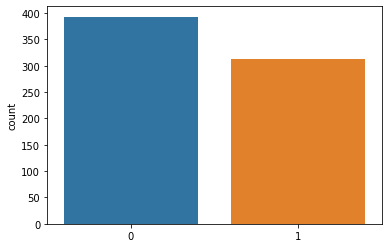

In [21]:
import seaborn as sns
sns.countplot(preds)

In [25]:
test_img_tensor[0].shape

(331, 331, 3)

0 image_names    2071.jpg
Name: 10, dtype: object


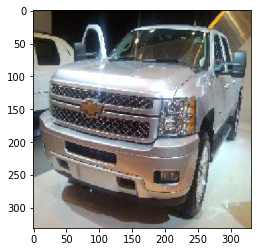

In [27]:
plt.imshow(test_img_tensor[10])
print(preds[10],test_img.iloc[10])

In [0]:
test_img['emergency_or_not'] = preds

In [30]:
test_img.shape

(706, 2)

In [0]:
test_img.to_csv('NASNetLarge_new.csv',index=False)

# NASNetLarge - end

# Build convolutional base for the pretrained convnet

In [0]:
convolution_base = VGG16(weights='imagenet',include_top=False,input_shape=(64,64,3))

# Detailed Architecture of VGG16 convolutional base

In [0]:
convolution_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_10 (InputLayer)        (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0     

#### Freezing set of layers preventing their weights to get updated during training

In [0]:
for layer in convolution_base.layers:
  layer.trainable = False

# Adding Densely connected classifier on top of the convolutional base

In [0]:
model = Sequential()
model.add(convolution_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 2, 2, 512)         14714688  
_________________________________________________________________
flatten_24 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_61 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_62 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_33 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_63 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_34 (Dropout)         (None, 128)             

# Compile the model 

In [0]:
#model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=0.001),metrics=['acc'])
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])
#model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])

# Data Augmentation

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_dir = '/content/drive/My Drive/AV_Hack/train_images'
validation_dir = '/content/drive/My Drive/AV_Hack/test_images'

In [0]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

In [0]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(64,64),batch_size=20,class_mode='binary')

Found 1234 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [0]:
test

## EarlyStopping

In [0]:
es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)

# Train the Model on training set and validate it on the validation set

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50,callbacks=[callbacks])

Epoch 1/50
100/100 [==============================] - 9s 92ms/step - loss: 0.6995 - accuracy: 0.5431 - val_loss: 0.6376 - val_accuracy: 0.6453
Epoch 2/50
100/100 [==============================] - 8s 83ms/step - loss: 0.6913 - accuracy: 0.5494 - val_loss: 0.6675 - val_accuracy: 0.6209
Epoch 3/50
100/100 [==============================] - 8s 84ms/step - loss: 0.6764 - accuracy: 0.5632 - val_loss: 0.6269 - val_accuracy: 0.6424
Epoch 4/50
100/100 [==============================] - 8s 85ms/step - loss: 0.6685 - accuracy: 0.5749 - val_loss: 0.6743 - val_accuracy: 0.6972
Epoch 5/50
100/100 [==============================] - 8s 84ms/step - loss: 0.6669 - accuracy: 0.5958 - val_loss: 0.6059 - val_accuracy: 0.6596
Epoch 6/50
100/100 [==============================] - 8s 85ms/step - loss: 0.6550 - accuracy: 0.6033 - val_loss: 0.5612 - val_accuracy: 0.7080
Epoch 7/50
100/100 [==============================] - 8s 83ms/step - loss: 0.6521 - accuracy: 0.6046 - val_loss: 0.6125 - val_accuracy: 0.6972

# Plotting Results

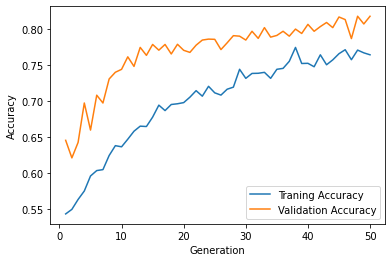

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
sns.lineplot(epochs,acc,label='Traning Accuracy')
sns.lineplot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()

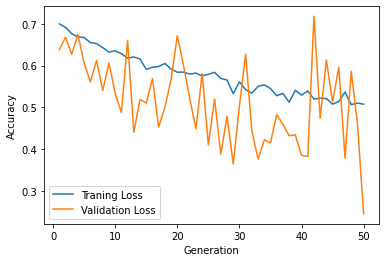

In [0]:
sns.lineplot(epochs,loss,label='Traning Loss')
sns.lineplot(epochs,val_loss,label='Validation Loss')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()

# Try Fine Tuning

In [0]:
convolution_base.trainable = True
set_trianable = False
for layer in convolution_base.layers:
  if layer.name == 'block5_conv1':
    set_trianable = True
  if set_trianable:
    layer.trainable =True
  else:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=100,validation_data=validation_generator,validation_steps=50)

Epoch 1/100
100/100 [==============================] - 9s 94ms/step - loss: 0.3718 - accuracy: 0.8456 - val_loss: 0.2311 - val_accuracy: 0.8506
Epoch 2/100
100/100 [==============================] - 9s 86ms/step - loss: 0.3446 - accuracy: 0.8556 - val_loss: 0.1061 - val_accuracy: 0.8303
Epoch 3/100
100/100 [==============================] - 9s 86ms/step - loss: 0.3461 - accuracy: 0.8667 - val_loss: 0.5179 - val_accuracy: 0.8504
Epoch 4/100
100/100 [==============================] - 8s 85ms/step - loss: 0.3403 - accuracy: 0.8627 - val_loss: 0.1951 - val_accuracy: 0.8404
Epoch 5/100
100/100 [==============================] - 9s 86ms/step - loss: 0.3328 - accuracy: 0.8691 - val_loss: 0.4492 - val_accuracy: 0.8567
Epoch 6/100
100/100 [==============================] - 8s 85ms/step - loss: 0.3241 - accuracy: 0.8591 - val_loss: 0.2332 - val_accuracy: 0.8494
Epoch 7/100
100/100 [==============================] - 9s 86ms/step - loss: 0.2958 - accuracy: 0.8838 - val_loss: 0.4602 - val_accuracy:

## Predictions for VGG16 Model

In [0]:
imgtst = test_img['image_names'].values.tolist()

In [0]:
img_path+"/"+image_name

'/content/drive/My Drive/AV_Hack/images/1639.jpg'

#### image preprocessing for predictions images

In [0]:
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path+"/"+image_name,target_size=(64,64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.
print(img_tensor.shape)


(1, 64, 64, 3)


In [0]:
model.predict(img_tensor)

array([[1.]], dtype=float32)

In [0]:
img = image.load_img(img_path+"/"+"792.jpg",target_size=(64,64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.
print(img_tensor.shape)

(1, 64, 64, 3)


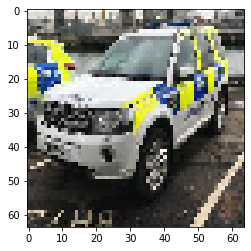

In [0]:
plt.imshow(img_tensor[0])

In [0]:
model.predict(img_tensor)

array([[0.09272207]], dtype=float32)

In [0]:
test_img_tensor = []
for image_name in imgtst :
  img = image.load_img(img_path+"/"+image_name,target_size=(64,64))
  img_tensor = image.img_to_array(img)
  img_tensor = np.expand_dims(img_tensor,axis=0)
  img_tensor /=255.
  test_img_tensor.append(img_tensor[0])

In [0]:
test_img_tensor  = np.array(test_img_tensor)

In [0]:
test_img_tensor.shape

(706, 64, 64, 3)

In [0]:
predictions = model.predict(test_img_tensor)

In [0]:
predictions

array([[1.00000000e+00],
       [4.78717266e-05],
       [1.00000000e+00],
       [9.27589354e-05],
       [1.00000000e+00],
       [1.92655413e-03],
       [9.99989629e-01],
       [2.40865633e-10],
       [1.92560896e-03],
       [9.86716747e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [8.66812691e-15],
       [1.00000000e+00],
       [2.60998189e-01],
       [1.44848184e-06],
       [3.49333376e-01],
       [4.36815768e-02],
       [9.99938369e-01],
       [8.60420056e-03],
       [1.00000000e+00],
       [9.98738229e-01],
       [9.89872932e-01],
       [6.77014410e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.48910502e-05],
       [4.15340215e-01],
       [1.00000000e+00],
       [3.22168018e-03],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [1.00000000e+00],
       [5.06126066e-13],
       [1.00000000e+00],
       [1.00000000e+00],


#### Label Predicted Formating 

since imagegenerator takes labels alphabetically(0- Emergency 1-non emergency so changed label in this logic

In [0]:
preds = []
for pred in predictions:
  if pred[0] <= 0.5:
    preds.append(1) 
  else:
    preds.append(0)

#### Visualize Labels predicted by the model

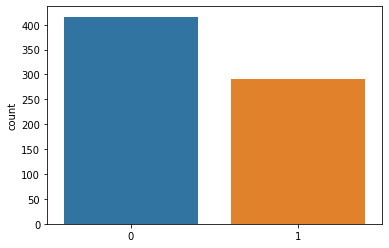

In [0]:
import seaborn as sns
sns.countplot(preds)

In [0]:
test_img['emergency_or_not'] = preds

In [0]:
test_img.shape

(706, 2)

In [0]:
test_img.iloc[0,:1]

image_names    1960.jpg
Name: 0, dtype: object

In [0]:
img = image.load_img(img_path+"/"+imgtst[10],target_size=(64,64))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor,axis=0)
img_tensor /=255.


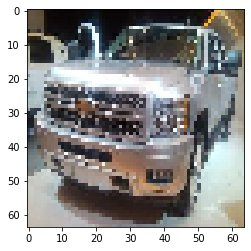

In [0]:
plt.imshow(img_tensor[0])

In [0]:
preds[10],test_img.iloc[10]

(0, image_names         2071.jpg
 emergency_or_not           0
 Name: 10, dtype: object)

In [0]:
test_img.to_csv('vgg16_new.csv',index=False)

## Hackathon score :	0.8541666667		

# Try VGG19 Model

# InceptionV3 Pre-Trained Model

In [0]:
from keras.applications.inception_v3 import InceptionV3

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(75,75),batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(75,75),batch_size=20,class_mode='binary')

Found 1234 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [0]:
inception_base = InceptionV3(weights='imagenet',include_top=False,input_shape=(75,75,3))
inception_base.summary()

87916544/87910968 [==============================] - 3s 0us/step
Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 75, 75, 3)    0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 37, 37, 32)   864         input_5[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 37, 37, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_99 (Activation)      (None, 37, 37, 32)   0           batch_normalization_1[0][0]      
______________________

In [0]:
model = Sequential()
model.add(inception_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_v3 (Model)         (None, 1, 1, 2048)        21802784  
_________________________________________________________________
flatten_18 (Flatten)         (None, 2048)              0         
_________________________________________________________________
dense_48 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dense_49 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_50 (Dense)             (None, 1)                 257       
Total params: 22,983,457
Trainable params: 1,180,673
Non-trainable params: 21,802,784
_________________________________________________________________


In [0]:
for layer in inception_base.layers:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
100/100 [==============================] - 11s 114ms/step - loss: 0.6954 - accuracy: 0.5376 - val_loss: 0.6509 - val_accuracy: 0.5945
Epoch 2/50
100/100 [==============================] - 11s 110ms/step - loss: 0.6952 - accuracy: 0.5478 - val_loss: 0.6928 - val_accuracy: 0.5823
Epoch 3/50
100/100 [==============================] - 11s 107ms/step - loss: 0.6910 - accuracy: 0.5573 - val_loss: 0.6607 - val_accuracy: 0.5912
Epoch 4/50
100/100 [==============================] - 11s 109ms/step - loss: 0.6895 - accuracy: 0.5597 - val_loss: 0.6512 - val_accuracy: 0.5691
Epoch 5/50
100/100 [==============================] - 11s 110ms/step - loss: 0.6827 - accuracy: 0.5639 - val_loss: 0.6611 - val_accuracy: 0.5986
Epoch 6/50
100/100 [==============================] - 11s 109ms/step - loss: 0.6865 - accuracy: 0.5629 - val_loss: 0.7068 - val_accuracy: 0.5830
Epoch 7/50
100/100 [==============================] - 11s 108ms/step - loss: 0.6873 - accuracy: 0.5667 - val_loss: 0.6895 - val_ac

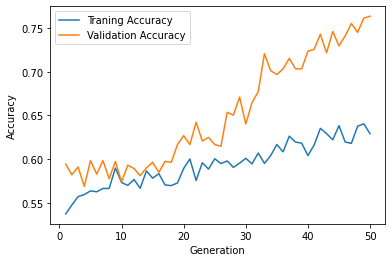

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
sns.lineplot(epochs,acc,label='Traning Accuracy')
sns.lineplot(epochs,val_acc,label='Validation Accuracy')
plt.xlabel('Generation')
plt.ylabel('Accuracy')
plt.legend()

# Fine Tuning

In [0]:
inception_base.trainable = True
set_trianable = False
for layer in convolution_base.layers:
  if layer.name == 'conv2d_41':
    set_trianable = True
  if set_trianable:
    layer.trainable =True
  else:
    layer.trainable = False

In [0]:
for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
100/100 [==============================] - 13s 135ms/step - loss: 0.7620 - accuracy: 0.4271 - val_loss: 0.8462 - val_accuracy: 0.4096
Epoch 2/50
100/100 [==============================] - 10s 98ms/step - loss: 0.7608 - accuracy: 0.4218 - val_loss: 0.7279 - val_accuracy: 0.4004
Epoch 3/50
100/100 [==============================] - 10s 96ms/step - loss: 0.7668 - accuracy: 0.4215 - val_loss: 0.7331 - val_accuracy: 0.4068
Epoch 4/50
100/100 [==============================] - 10s 97ms/step - loss: 0.7673 - accuracy: 0.4238 - val_loss: 0.7636 - val_accuracy: 0.4126
Epoch 5/50
100/100 [==============================] - 9s 95ms/step - loss: 0.7619 - accuracy: 0.4225 - val_loss: 0.7102 - val_accuracy: 0.3953
Epoch 6/50
100/100 [==============================] - 10s 97ms/step - loss: 0.7596 - accuracy: 0.4240 - val_loss: 0.7698 - val_accuracy: 0.4078
Epoch 7/50
100/100 [==============================] - 9s 95ms/step - loss: 0.7681 - accuracy: 0.4135 - val_loss: 0.7066 - val_accuracy: 

KeyboardInterrupt: ignored

https://www.analyticsvidhya.com/blog/2018/10/understanding-inception-network-from-scratch/

In [0]:
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler
from keras import backend as K 

In [0]:
# Transform targets to keras compatible format
y_train = np_utils.to_categorical(y_train,2)
y_test= np_utils.to_categorical(y_test, 2)

In [0]:
X_train = X_train.astype('float32')
X_test= X_test.astype('float32')

# preprocess data
X_train = X_train / 255.0
X_test = X_test / 255.0

In [0]:
def inception_module(x,
                     filters_1x1,
                     filters_3x3_reduce,
                     filters_3x3,
                     filters_5x5_reduce,
                     filters_5x5,
                     filters_pool_proj,
                     name=None):
    
    conv_1x1 = Conv2D(filters_1x1, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    
    conv_3x3 = Conv2D(filters_3x3_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_3x3 = Conv2D(filters_3x3, (3, 3), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_3x3)

    conv_5x5 = Conv2D(filters_5x5_reduce, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    conv_5x5 = Conv2D(filters_5x5, (5, 5), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(conv_5x5)

    pool_proj = MaxPool2D((3, 3), strides=(1, 1), padding='same')(x)
    pool_proj = Conv2D(filters_pool_proj, (1, 1), padding='same', activation='relu', kernel_initializer=kernel_init, bias_initializer=bias_init)(pool_proj)

    output = concatenate([conv_1x1, conv_3x3, conv_5x5, pool_proj], axis=3, name=name)
    
    return output

In [0]:
import keras
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [0]:
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten
import math

In [0]:
input_layer = Input(shape=(224, 224, 3))

x = Conv2D(64, (7, 7), padding='same', strides=(2, 2), activation='relu', name='conv_1_7x7/2', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_1_3x3/2')(x)
x = Conv2D(64, (1, 1), padding='same', strides=(1, 1), activation='relu', name='conv_2a_3x3/1')(x)
x = Conv2D(192, (3, 3), padding='same', strides=(1, 1), activation='relu', name='conv_2b_3x3/1')(x)
x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_2_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=64,
                     filters_3x3_reduce=96,
                     filters_3x3=128,
                     filters_5x5_reduce=16,
                     filters_5x5=32,
                     filters_pool_proj=32,
                     name='inception_3a')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=192,
                     filters_5x5_reduce=32,
                     filters_5x5=96,
                     filters_pool_proj=64,
                     name='inception_3b')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_3_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=192,
                     filters_3x3_reduce=96,
                     filters_3x3=208,
                     filters_5x5_reduce=16,
                     filters_5x5=48,
                     filters_pool_proj=64,
                     name='inception_4a')


x1 = AveragePooling2D((5, 5), strides=3)(x)
x1 = Conv2D(128, (1, 1), padding='same', activation='relu')(x1)
x1 = Flatten()(x1)
x1 = Dense(1024, activation='relu')(x1)
x1 = Dropout(0.7)(x1)
x1 = Dense(2, activation='softmax', name='auxilliary_output_1')(x1)

x = inception_module(x,
                     filters_1x1=160,
                     filters_3x3_reduce=112,
                     filters_3x3=224,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4b')

x = inception_module(x,
                     filters_1x1=128,
                     filters_3x3_reduce=128,
                     filters_3x3=256,
                     filters_5x5_reduce=24,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4c')

x = inception_module(x,
                     filters_1x1=112,
                     filters_3x3_reduce=144,
                     filters_3x3=288,
                     filters_5x5_reduce=32,
                     filters_5x5=64,
                     filters_pool_proj=64,
                     name='inception_4d')


x2 = AveragePooling2D((5, 5), strides=3)(x)
x2 = Conv2D(128, (1, 1), padding='same', activation='relu')(x2)
x2 = Flatten()(x2)
x2 = Dense(1024, activation='relu')(x2)
x2 = Dropout(0.7)(x2)
x2 = Dense(2, activation='softmax', name='auxilliary_output_2')(x2)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_4e')

x = MaxPool2D((3, 3), padding='same', strides=(2, 2), name='max_pool_4_3x3/2')(x)

x = inception_module(x,
                     filters_1x1=256,
                     filters_3x3_reduce=160,
                     filters_3x3=320,
                     filters_5x5_reduce=32,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5a')

x = inception_module(x,
                     filters_1x1=384,
                     filters_3x3_reduce=192,
                     filters_3x3=384,
                     filters_5x5_reduce=48,
                     filters_5x5=128,
                     filters_pool_proj=128,
                     name='inception_5b')

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)

x = Dropout(0.4)(x)

x = Dense(2, activation='softmax', name='output')(x)

In [0]:
model = Model(input_layer, [x, x1, x2], name='inception_v1')

In [0]:
model.summary()

Model: "inception_v1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
conv_1_7x7/2 (Conv2D)           (None, 112, 112, 64) 9472        input_8[0][0]                    
__________________________________________________________________________________________________
max_pool_1_3x3/2 (MaxPooling2D) (None, 56, 56, 64)   0           conv_1_7x7/2[0][0]               
__________________________________________________________________________________________________
conv_2a_3x3/1 (Conv2D)          (None, 56, 56, 64)   4160        max_pool_1_3x3/2[0][0]           
_______________________________________________________________________________________

In [0]:
epochs = 25
initial_lrate = 0.01

def decay(epoch, steps=100):
    initial_lrate = 0.01
    drop = 0.96
    epochs_drop = 8
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

sgd = SGD(lr=initial_lrate, momentum=0.9, nesterov=False)

lr_sc = LearningRateScheduler(decay, verbose=1)

model.compile(loss=['categorical_crossentropy', 'categorical_crossentropy', 'categorical_crossentropy'], loss_weights=[1, 0.3, 0.3], optimizer=sgd, metrics=['accuracy'])


In [0]:
history = model.fit(X_train, [y_train, y_train, y_train], validation_data=(X_test, [y_test, y_test, y_test]), epochs=epochs, batch_size=256, callbacks=[lr_sc])

Train on 1316 samples, validate on 330 samples
Epoch 1/25

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
1316/1316 [==============================] - 8s 6ms/step - loss: 1.7409 - output_loss: 1.1729 - auxilliary_output_1_loss: 0.8429 - auxilliary_output_2_loss: 0.7855 - output_accuracy: 0.4886 - auxilliary_output_1_accuracy: 0.5281 - auxilliary_output_2_accuracy: 0.5327 - val_loss: 1.0945 - val_output_loss: 0.6848 - val_auxilliary_output_1_loss: 0.7213 - val_auxilliary_output_2_loss: 0.6921 - val_output_accuracy: 0.6152 - val_auxilliary_output_1_accuracy: 0.3848 - val_auxilliary_output_2_accuracy: 0.6121
Epoch 2/25

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
1316/1316 [==============================] - 3s 2ms/step - loss: 1.1713 - output_loss: 0.7337 - auxilliary_output_1_loss: 0.7580 - auxilliary_output_2_loss: 0.7284 - output_accuracy: 0.5236 - auxilliary_output_1_accuracy: 0.4742 - auxilliary_output_2_accuracy: 0.5296 - val_loss: 1.0706 - v

In [0]:
from keras.applications.densenet import DenseNet121

In [0]:
dense_net_base = DenseNet121(
    include_top=False,
    weights="imagenet",
    input_shape=(64,64,3)
)

29089792/29084464 [==============================] - 1s 0us/step


In [0]:
dense_net_base.summary()

Model: "densenet121"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            (None, 64, 64, 3)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 70, 70, 3)    0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1/conv (Conv2D)             (None, 32, 32, 64)   9408        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
conv1/bn (BatchNormalization)   (None, 32, 32, 64)   256         conv1/conv[0][0]                 
________________________________________________________________________________________

In [0]:
model = Sequential()
model.add(dense_net_base)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_21"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet121 (Model)          (None, 2, 2, 1024)        7037504   
_________________________________________________________________
flatten_23 (Flatten)         (None, 4096)              0         
_________________________________________________________________
dense_55 (Dense)             (None, 512)               2097664   
_________________________________________________________________
dense_56 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_29 (Dropout)         (None, 256)               0         
_________________________________________________________________
dense_57 (Dense)             (None, 128)               32896     
_________________________________________________________________
dropout_30 (Dropout)         (None, 128)             

In [0]:
for layer in dense_net_base.layers:
    layer.trainable = False

In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

In [0]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(64,64),batch_size=20,class_mode='binary')
validation_generator = validation_datagen.flow_from_directory(validation_dir,target_size=(64,64),batch_size=20,class_mode='binary')

Found 1234 images belonging to 2 classes.
Found 412 images belonging to 2 classes.


In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50)

Epoch 1/50
100/100 [==============================] - 20s 197ms/step - loss: 0.8398 - accuracy: 0.4784 - val_loss: 0.6842 - val_accuracy: 0.5752
Epoch 2/50
100/100 [==============================] - 11s 113ms/step - loss: 0.7733 - accuracy: 0.4854 - val_loss: 0.6456 - val_accuracy: 0.6026
Epoch 3/50
100/100 [==============================] - 11s 113ms/step - loss: 0.7427 - accuracy: 0.4774 - val_loss: 0.6884 - val_accuracy: 0.5861
Epoch 4/50
100/100 [==============================] - 11s 114ms/step - loss: 0.7334 - accuracy: 0.4774 - val_loss: 0.7012 - val_accuracy: 0.5671
Epoch 5/50
100/100 [==============================] - 11s 113ms/step - loss: 0.7078 - accuracy: 0.5206 - val_loss: 0.6554 - val_accuracy: 0.5965
Epoch 6/50
100/100 [==============================] - 11s 114ms/step - loss: 0.7131 - accuracy: 0.5211 - val_loss: 0.6543 - val_accuracy: 0.6045
Epoch 7/50
100/100 [==============================] - 11s 113ms/step - loss: 0.7040 - accuracy: 0.5288 - val_loss: 0.6661 - val_ac

In [0]:
import tensorflow as tf

# Implement callback function to stop training
# when accuracy reaches ACCURACY_THRESHOLD
ACCURACY_THRESHOLD = 0.85

class myCallback(tf.keras.callbacks.Callback):
	def on_epoch_end(self, epoch, logs={}):
		if(logs.get('accuracy') > ACCURACY_THRESHOLD):
			print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))
			self.model.stop_training = True

# Instantiate a callback object
callbacks = myCallback()

In [0]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=50,validation_data=validation_generator,validation_steps=50,callbacks=[callbacks]))